<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/04_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀(Linear Regression)

matplotlib 업그레이드

In [1]:
# 애니메이션을 위한 matplotlib 업그레이드
!pip install --upgrade matplotlib==3.4.3

In [2]:
!pip list | grep matplot

matplotlib                    3.4.3
matplotlib-inline             0.1.2
matplotlib-venn               0.11.6


**선형회귀**

In [3]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [4]:
x_train = np.array([[0.2], [0.8]])
y_train = np.array([[0.3], [0.9]])

# 입력은 1차원 변수
input_layer = Input((1))
# 출력은 1개짜리 변수
output_layer = Dense(1, activation = None)(input_layer)
# 모델 정의
model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


초기 w,b 값 출력

In [5]:
layer = model.layers[1]
weights = layer.get_weights()
# weights[0]: w tensor
# w[0]: w vector of 0th input
# w[0][0]: 0th input to 0th output
w_start = weights[0][0][0] 
# weights[1]: b tensor
# b[0]: bios of 0th output 
b_start = weights[1][0]
print(weights[0])
print(weights[1])
print(w_start, b_start)

[[-0.40544152]]
[0.]
-0.40544152 0.0


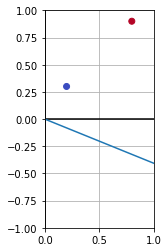

In [6]:
from matplotlib import pyplot as plt
from matplotlib import cm

w = w_start
b = b_start

# matplotlib에서 많이 쓰이는 형식. subplot을 생성한다.
fig, ax = plt.subplots()
# 가로 세로 비율을 동일하게 그리기
ax.set_aspect('equal')
# 눈금자 표시
ax.grid(True, which='both')

# x축과 y축을 그리기
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
# x의 범위는 (0,1), y의 범위는 (-1,1)까지만 그리자
ax.axis([0,1,-1,1])
# 학습데이터 값을 색을 입혀서 그려보기. (cm.coolwarm을 사용하면 작은 값은 청색, 큰 값은 적색으로 그린다.)
ax.scatter(x_train, y_train, c=y_train, cmap=cm.coolwarm)

# 추론 직선 그리기
x = np.linspace(0,1,51)
y = w*x + b
ax.plot(x,y)

plt.show()

In [18]:
from tensorflow.keras.optimizers import Adam, SGD

# 손실함수는 mse로 optimizer는 SGD로 지정 (학습율은 0.05로 지정)하여 컴파일
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05))

# 모델 학습
model.fit(x_train, y_train, epochs=400)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
2/2 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 2/400
2/2 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 3/400
2/2 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 4/400
2/2 [==============================] - 0s 2ms/step - loss: 0.0262
Epoch 5/400
2/2 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 6/400
2/2 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 7/400
2/2 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 8/400
2/2 [==============================] - 0s 8ms/step - loss: 0.0262
Epoch 9/400
2/2 [==============================] - 0s 4ms/step - loss: 0.0262
Epoch 10/400
2/2 [==============================] - 0s 6ms/step - loss: 0.0262
Epoch 11/400
2/2 [==============================] - 0s 8ms/step - loss: 0.0262
Epoch 12/400
2/2 [==============================] - 0s 5ms/step - loss: 0.0262
Epoch 13/400
2/2 [==============================] - 0s 5ms/st

In [8]:
# check weights and prediction
layer = model.layers[1]
weights = layer.get_weights()
print('w = ', weights[0], 'b = ', weights[1]) # w,b
preds = model.predict(x_train)
#print(preds)

w =  [[0.93918025]] b =  [0.13273104]


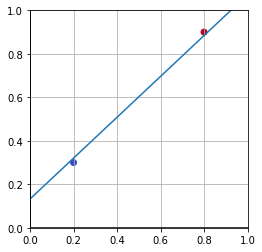

In [9]:
w = weights[0][0][0]
b = weights[1][0]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([0,1,0,1])
ax.scatter(x_train, y_train, c=y_train, cmap=cm.coolwarm)
x = np.linspace(0,1,51)
y = w*x + b
ax.plot(x,y)
plt.show()

**선형회귀** 

이번에는 데이터 수를 6개로 늘린 학습을 수행한다.

입력 속성: 1개  
출력 속성: 1개  
데이터 수: 6개  

In [10]:
from tensorflow import keras
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
from matplotlib import rc, cm

x_train = np.array([[0.2], [0.8], [0.3], [0.7], [0.4], [0.5]])
y_train = np.array([[0.3], [0.9], [0.7], [0.9], [0.4], [0.6]])

input_layer = Input((1))
output_layer = Dense(1, activation = None)(input_layer)
model = Model(input_layer, output_layer)

# 각 epoch마다 w,b를 wb변수에 기록
class wbHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.wb = []
    def on_batch_end(self, batch, logs=None):
        layer = self.model.layers[1]
        weights = layer.get_weights()
        self.wb.append(weights)

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.05), metrics=['mse'])        
history = wbHistory()
model.fit(x_train, y_train, epochs=400, callbacks=[history])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
1/1 [==============================] - 0s 235ms/step - loss: 1.0368 - mse: 1.0368
Epoch 2/400
1/1 [==============================] - 0s 9ms/step - loss: 0.8129 - mse: 0.8129
Epoch 3/400
1/1 [==============================] - 0s 6ms/step - loss: 0.6411 - mse: 0.6411
Epoch 4/400
1/1 [==============================] - 0s 5ms/step - loss: 0.5092 - mse: 0.5092
Epoch 5/400
1/1 [==============================] - 0s 5ms/step - loss: 0.4079 - mse: 0.4079
Epoch 6/400
1/1 [==============================] - 0s 5ms/step - loss: 0.3302 - mse: 0.3302
Epoch 7/400
1/1 [==============================] - 0s 7ms/step - loss: 0.2704 - mse: 0.2704
Epoch 8/400
1/1 [==============================] - 0s 9ms/step - loss: 0.2245 - mse: 0.2245
Epoch 9/400
1/1 [==============================] - 0s 10ms/step - loss: 0.1892 - mse: 0.1892
Epoch 10/400
1/1 [==============================] - 0s 5ms/step - loss: 0.1620 - mse: 0.1620
Epoch 11/400
1/1 [==============================] - 0s 10ms/step - loss: 0.1

**선형회귀 시뮬레이션**

In [12]:
fig, ax = plt.subplots()
plt.close()
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([0,1,0,1])
ax2, = ax.plot([], [])
x = np.linspace(0,1,51)
ret = ax.scatter(x_train, y_train, c=y_train, cmap=cm.coolwarm)

def animate(i):
  w = history.wb[i][0][0][0]
  b = history.wb[i][1][0]
  y = w*x + b
  ax2.set_data(x, y)
  return (ax2,)

ani = matplotlib.animation.FuncAnimation(fig, animate,
                                         frames=len(history.wb), interval=100)
# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
ani

**분류를 위한 데이터 셋**  

입력 속성 1개: x  
출력 속성 1개: y  

그룹1은 0.2를 중심으로 $\sigma$(표준편차) 만큼 분산된 데이터  
출력값: 0 
그룹2는 0.8을 중심으로 $\sigma$(표준편차) 만큼 분산된 데이터  
출력값: 1  

In [14]:
# 데이터를 생성
def prepare_data(n=50, sigma=0.15):
  # 그룹1과 그룹2의 갯수는 각각 절반씩
  n1 = int(n/2);
  n2 = n - n1;
  # group1 data
  # 그룹1의 입력데이터는 평균 0.2, 표준편차 0.15의 25개 데이터
  x1 = np.random.normal(loc=0.2, scale=sigma, size=n1)
  # 그룹1의 라벨은 0(0.0)으로 한다
  y1 = np.random.normal(loc=0.0, scale=0.0, size=n1)

  # group2 data
  # 그룹1의 입력데이터는 평균 0.8, 표준편차 0.15의 25개 데이터
  x2 = np.random.normal(loc=0.8, scale=sigma, size=n2)
  # 그룹1의 라벨은 1(1.0)으로 한다
  y2 = np.random.normal(loc=1.0, scale=0.0, size=n2)

  # assemble all data
  x = np.concatenate((x1, x2))
  y = np.concatenate((y1, y2))
  return (x, y)

(x_train, y_train) = prepare_data(n=50)

In [16]:
# 입력은 1차원의 데이터
input_layer = Input((1))
#output_layer = Dense(1, activation = None)(input_layer)
# 출력의 활성함수를 sigmoid 함수로 지정
output_layer = Dense(1, activation = 'sigmoid')(input_layer)

# 모델 정의
model = Model(input_layer, output_layer)

# 손실함수와 optimizer를 지정하여 컴파일
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1)) 

# 모델 학습 epoch 수는 2000번으로 한다.
model.fit(x_train, y_train, epochs=2000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.1855
Epoch 2/2000
2/2 [==============================] - 0s 7ms/step - loss: 0.1835
Epoch 3/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.1817
Epoch 4/2000
2/2 [==============================] - 0s 2ms/step - loss: 0.1801
Epoch 5/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.1785
Epoch 6/2000
2/2 [==============================] - 0s 6ms/step - loss: 0.1769
Epoch 7/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.1754
Epoch 8/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.1740
Epoch 9/2000
2/2 [==============================] - 0s 5ms/step - loss: 0.1726
Epoch 10/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.1712
Epoch 11/2000
2/2 [==============================] - 0s 3ms/step - loss: 0.1698
Epoch 12/2000
2/2 [==============================] - 0s 4ms/step - loss: 0.1685
Epoch 13/2000
2/2 [==============================

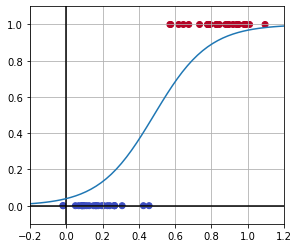

In [17]:
# check weights and prediction
layer = model.layers[1]
weights = layer.get_weights()
w = weights[0][0][0]
b = weights[1][0]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([-0.2,1.2,-0.1,1.1])
ax.scatter(x_train, y_train, c=y_train, cmap=cm.coolwarm)
x = np.linspace(-0.2,1.2,51)
z = w*x + b
y = 1/(1+np.exp(-z))
ax.plot(x,y)
plt.show()

**2차원 분류**  
입력 데이터

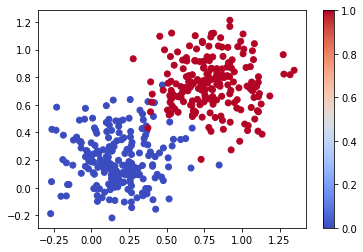

In [ ]:

def prepare_data2d(n=10, sigma=0.2):
  n1 = int(n/2);
  n2 = n - n1;
  # group1 data
  x1 = np.random.normal(loc=(0.2,0.2), scale=(sigma, sigma), size=(n1,2))
  y1 = np.random.normal(loc=0.0, scale=0.0, size=n1)
  # group2 data
  x2 = np.random.normal(loc=(0.8,0.8), scale=(sigma, sigma), size=(n2,2))
  y2 = np.random.normal(loc=1.0, scale=0.0, size=n2)
  # assemble all data
  x = np.concatenate((x1, x2))
  y = np.concatenate((y1, y2))
  return (x, y)

(x_train, y_train) = prepare_data2d(n=400)
plt.scatter(x_train[:,:1], x_train[:,1:],c=y_train, cmap=cm.coolwarm)
plt.colorbar();
plt.show()

In [ ]:
input_layer = Input((2))
#output_layer = Dense(2, activation = None)(input_layer)
output_layer = Dense(1, activation = 'sigmoid')(input_layer)
model = Model(input_layer, output_layer)

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['mse'])        
model.fit(x_train, y_train, epochs=400)

Epoch 1/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2287 - mse: 0.2287
Epoch 2/400
13/13 [==============================] - 0s 941us/step - loss: 0.2203 - mse: 0.2203
Epoch 3/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2129 - mse: 0.2129
Epoch 4/400
13/13 [==============================] - 0s 1ms/step - loss: 0.2059 - mse: 0.2059
Epoch 5/400
13/13 [==============================] - 0s 1ms/step - loss: 0.1996 - mse: 0.1996
Epoch 6/400
13/13 [==============================] - 0s 1ms/step - loss: 0.1936 - mse: 0.1936
Epoch 7/400
13/13 [==============================] - 0s 1ms/step - loss: 0.1880 - mse: 0.1880
Epoch 8/400
13/13 [==============================] - 0s 952us/step - loss: 0.1827 - mse: 0.1827
Epoch 9/400
13/13 [==============================] - 0s 1ms/step - loss: 0.1776 - mse: 0.1776
Epoch 10/400
13/13 [==============================] - 0s 1ms/step - loss: 0.1728 - mse: 0.1728
Epoch 11/400
13/13 [==============================] - 0

In [ ]:
preds = model.predict(x_train)


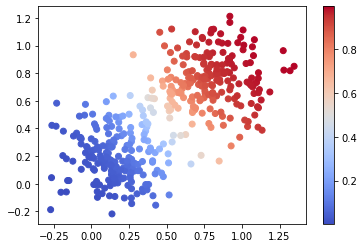

In [ ]:
plt.scatter(x_train[:,:1], x_train[:,1:],c=preds, cmap=cm.coolwarm)
plt.colorbar();
plt.show()

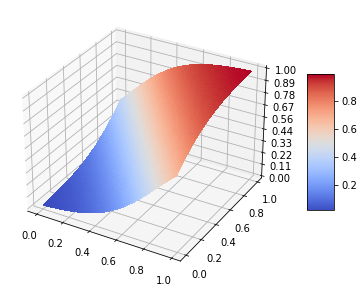

In [ ]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Make data.
X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)

X, Y = np.meshgrid(X, Y)
xy = np.vstack((X.flatten(), Y.flatten())).T

# 모델 예측값
preds = model.predict(xy)

Z = preds.reshape((len(X), len(Y)))
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.00, 1.00)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
print(X)
print(Y)
print(xy)

[[0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 ...
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]]
[[0.   0.  ]
 [0.01 0.  ]
 [0.02 0.  ]
 ...
 [0.97 0.99]
 [0.98 0.99]
 [0.99 0.99]]


#텐서플로우 플레이그라운드  

신경망 실습  
[playground.tensorflow.org](https://playground.tensorflow.org/)  

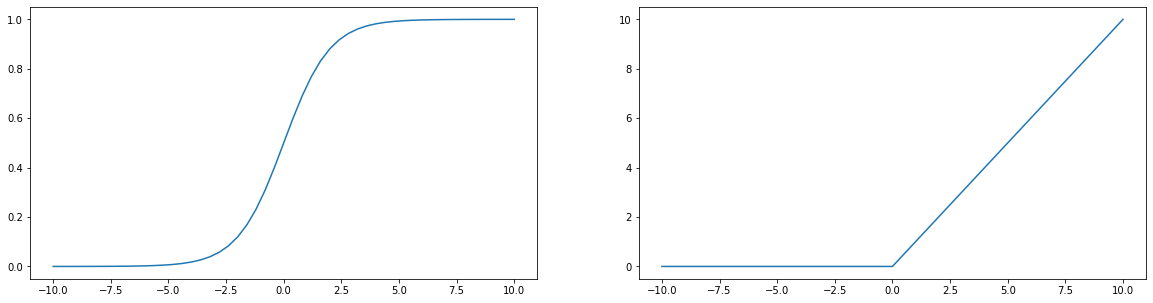

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
#sigmoid
x = np.linspace(-10, 10, 51)
y = 1/(1+np.exp(-x))
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(x,y)
#ReLu
y = np.linspace(-10,10,51)
y[x<0]=0.
plt.subplot(1,2,2)
plt.plot(x,y)

# 영상 학습 및 인식
**이미지 읽기**

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
NUM_CLASSES = 10

11493376/11490434 [==============================] - 0s 0us/step


**데이터 전처리**

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

**샘플 이미지 출력**

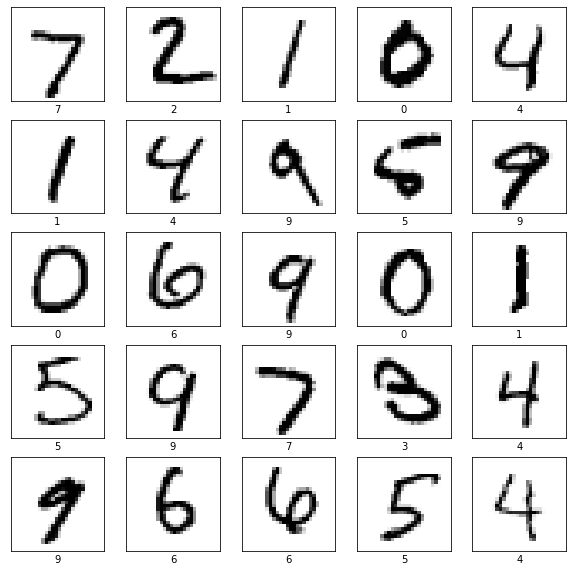

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()])
#plt.show()

**모델 만들기**

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input((28, 28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

**모델 요약**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**모델 시각화**

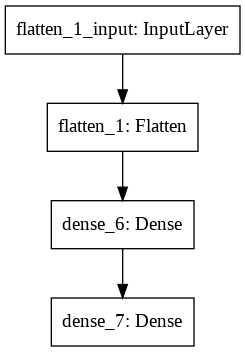

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

**모델 컴파일 및 학습**

In [ ]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0858 - accuracy: 0.3048
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0718 - accuracy: 0.5806
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0557 - accuracy: 0.7018
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0444 - accuracy: 0.7550
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0382 - accuracy: 0.7759
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0337 - accuracy: 0.7988
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0297 - accuracy: 0.8380
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0268 - accuracy: 0.8547
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0247 - accuracy: 0.8648
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.023

**모델 평가**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0213 - accuracy: 0.8802


In [ ]:
predictions = model.predict(x_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

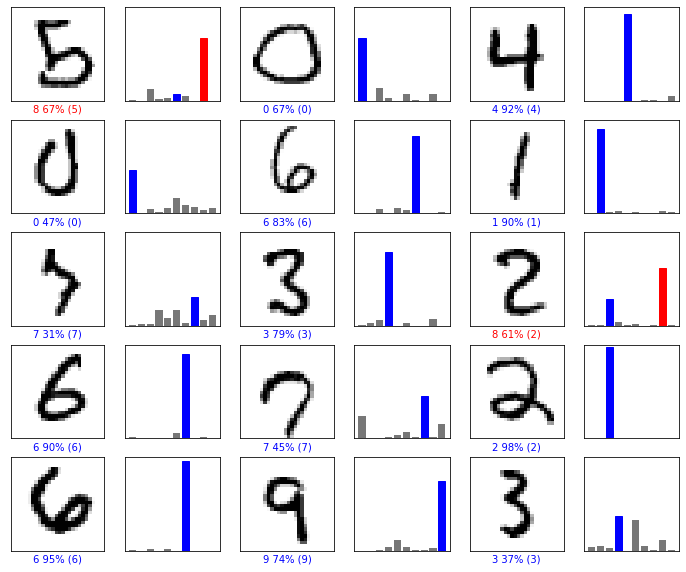

In [ ]:

# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+720, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+720, predictions, test_labels)
plt.show()